# Titanic

### Explicação sobre o dataset: 

O  Dataset  consiste  em  dados  dos  passageiros  do  Titanic,  tais  como 
cabine, número de irmãos e pais, sexo, local de embarque, valor do ticket 
entre outros, totalizando 12 colunas e 891 linhas. 

### Objetivo do trabalho: 
 
Classificar passageiros que sobreviveram ou não a partir das relações de 
seus atributos. A partir destes mesmos atributos, realizar uma 
clusterização a fim de identificar grupos de pessoas com características 
semelhantes. 
 
 
### Atividades que serão realizadas sobre o dataset para atingir o objetivo: 
 
Classificação 

Clusterização 


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from sklearn import tree


In [ ]:
titanic_data = pd.read_csv('./dataset/Titanic-Dataset.csv')
titanic_data.head()
print(len(titanic_data.loc[titanic_data.Sex == "male", ]))
print(len(titanic_data.loc[titanic_data.Sex == "female", ]))


577
314


### Atributos e valores faltantes

In [ ]:
tipos_atributos = titanic_data.dtypes

valores_nulos = titanic_data.isnull().sum()

tipos_atributos, valores_nulos

(PassengerId      int64
 Survived         int64
 Pclass           int64
 Name            object
 Sex             object
 Age            float64
 SibSp            int64
 Parch            int64
 Ticket          object
 Fare           float64
 Cabin           object
 Embarked        object
 dtype: object,
 PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64)

### Lidando com valores ausentes
Baseado nas informações acima, temos valores ausentes para os atributos AGe, Cabin e Embarked. Para os atributos AGe e Cabin, vamos prencher os valores ausentes com o valor da média e o valor mais frequente, respectivamente. Já o atributo Cabin, vamos descartar, pois são muitos e não temos um mapa das cabines que pudesse afetar na predição

In [ ]:
imputer_age = SimpleImputer(strategy='mean')
imputer_embarked = SimpleImputer(strategy='most_frequent')

titanic_data['Age'] = imputer_age.fit_transform(titanic_data[['Age']])
titanic_data['Embarked'] = imputer_embarked.fit_transform(titanic_data[['Embarked']]).ravel()

titanic_data = titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Categorização de atributos

In [ ]:
label_encoder_sex = LabelEncoder()
label_encoder_embarked = LabelEncoder()

titanic_data['Sex'] = label_encoder_sex.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder_embarked.fit_transform(titanic_data['Embarked'])
bins = [0, 12, 17, 64, 100] 
labels = [0, 1, 2, 3]
titanic_data['AgeGroup'] =  pd.cut(titanic_data['Age'], bins=bins, labels=labels, right=True) 

titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,0,3,1,22.0,1,0,7.2500,2,2
1,1,1,0,38.0,1,0,71.2833,0,2
2,1,3,0,26.0,0,0,7.9250,2,2
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,2,2


### Remover classe alvo

In [ ]:
X = titanic_data.drop(columns=['Survived', 'Parch', 'SibSp', 'Embarked', 'Age', 'Fare'])
y = titanic_data['Survived']

### Separar conjunto de treino e validação

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Treino

In [ ]:
decision_tree = DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

### Métricas

In [ ]:
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Acurácia: {accuracy}")
print("Relatório de Classificação:")
print(classification_rep)

Acurácia: 0.7932960893854749
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.75      0.96      0.85       105
           1       0.91      0.55      0.69        74

    accuracy                           0.79       179
   macro avg       0.83      0.76      0.77       179
weighted avg       0.82      0.79      0.78       179



### Balanceando os dados

In [ ]:
undersample = RandomUnderSampler(sampling_strategy='majority')
x_over, y_over = undersample.fit_resample(X, y)

In [ ]:
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(x_over, y_over, test_size=0.2, random_state=42)

In [ ]:
decision_tree_balanced = DecisionTreeClassifier(criterion='entropy')
decision_tree_balanced.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred = decision_tree_balanced.predict(X_test_balanced)
accuracy_balanced = accuracy_score(y_test_balanced, y_pred)
classification_rep_balanced = classification_report(y_test_balanced, y_pred)

print(f"Acurácia: {accuracy_balanced}")
print("Relatório de Classificação:")
print(classification_rep_balanced)

Acurácia: 0.8102189781021898
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        78
           1       0.82      0.71      0.76        59

    accuracy                           0.81       137
   macro avg       0.81      0.80      0.80       137
weighted avg       0.81      0.81      0.81       137



### Resultados após 5 rodadas
Dados desbalanceados
- F1-Score:
    - Não sobreviveu (0): 0.83
    - Sobreviveu (1): 0.75
    - Média Geral dos dois atributos: 0.79



Dados Balanceados
- F1-Score:
    - Não sobreviveu (0): 0.79
    - Sobreviveu (1): 0.75
    - Média Geral dos dois atributos: 0.77


### Árvore de decisão

In [ ]:
print(X.columns)

Index(['Pclass', 'Sex', 'AgeGroup'], dtype='object')


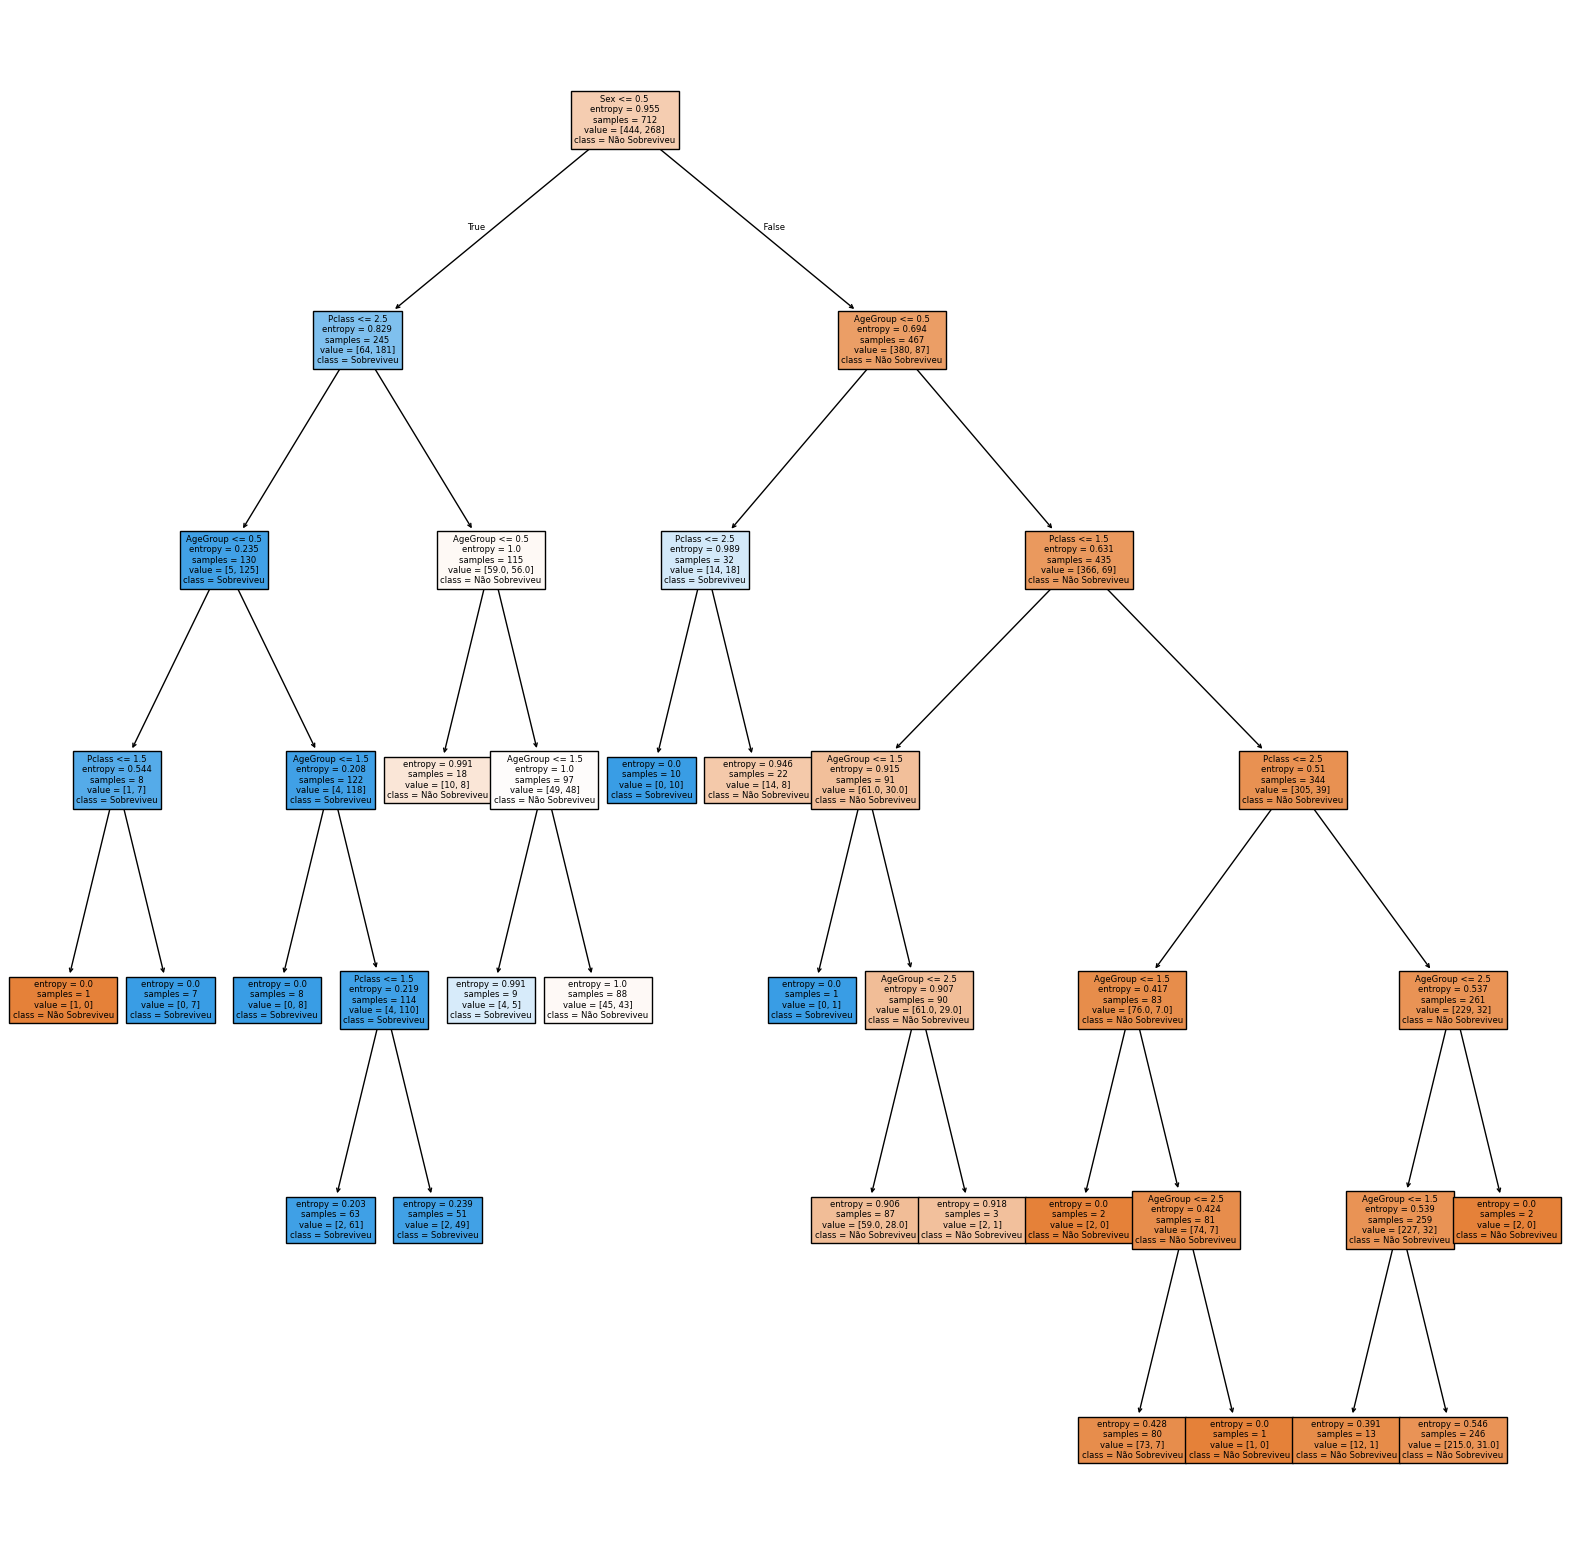

In [ ]:
fig = plt.figure(figsize=(20,20))
tree.plot_tree(decision_tree,
               feature_names=X.columns,
               class_names=["Não Sobreviveu", "Sobreviveu"],
               filled=True)
plt.show()
